In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
%cd /content/drive/My\ Drive/Winter\ 2022/CME241

Mounted at /content/drive
/content/drive/My Drive/Winter 2022/CME241


In [71]:
from rl.distribution import *
from rl.markov_process import *
from rl.markov_decision_process import *
from rl.policy import *

import matplotlib.pyplot as plt

#1. Deterministic Policy of an Infinitely-Countable Spaces Game


Note that since the policy is deterministic, we know that if the current state is $s$, the result action can be only one action: $a= \pi_D(s)$.

The Bellman Equations can be writtewn as

\begin{align*}
  V^{\pi_D}(s) &= Q^{\pi_D}(s, \pi_D(s))\\
  Q^{\pi_D}(s, a) &= \mathcal{R}(s,a) + \gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}(s,a,s')\cdot V^{\pi_D}(s')\\
  V^{\pi_D}(s) &= \mathcal{R}(s,\pi_D(s)) + \gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}(s,\pi_D(s),s')\cdot V^{\pi_D}(s')\\
  Q^{\pi_D}(s, a) &= \mathcal{R}(s,a) + \gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}(s,a,s')\cdot Q^{\pi_D}(s', \pi_D(s'))
\end{align*}

Next, we will introduce the game.
1. The states are $\{1,2,3,4,\dots\}$
2. The start state is at $1$.
3. Policy to be chosen at any state is $a$ from $[0,1]$. With probability $a$, the state will become $s+1$ with reward $(1-a)$. With probability $1-a$, the state will remain at $s$ with reward $(1+a)$.
4. The discount factor $\gamma = 0.5$

From the condition, at any state, 
\begin{align*}
  \mathcal{R}(s,a) &= a(1-a) + (1-a)(1+a)\\
  &= 1+a-2a^2
\end{align*}

Notice that the reward and the transition do not depend on $s$. Thus, what is optimal in a state $s$ will also be optimal at any other state $s'$.
We know there is a deterministic policy that is optimla for a game, discrete-time, countable-spaces, time-homogeneous MDP. Since we want to get a deterministic policy, we will denote the optimal choice of $a$ at any $s$ to be $a^*$.

Consider
\begin{align*}
  Q^{\pi_D}(s, a^*) &= \mathcal{R}(s,a^*) + \gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}(s,a^*,s')\cdot Q^{\pi_D}(s', \pi_D(s'))\\
  Q^*(s, a^*)&= \mathcal{R}(s,a^*) + \gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}(s,a^*,s')\cdot Q^*(s, a^*)\\
  &= \mathcal{R}(s,a^*) + \gamma \cdot  Q^*(s, a^*)\\
  &^= \frac{\mathcal{R}(s,a^*)}{1-\gamma} = 2\mathcal{R}(s,a^*)
\end{align*}

This suggests that the policy is to choose $a^*$ such that $\mathcal{R}(s,a^*)$ is maximized. Thus, $a^*=1/4$ and $\mathcal{R}(s,a^*)=9/8$.

Therefore,
\begin{align*}
Q^*(s, a^*)&=9/4\\
V^*(s)&=9/4\\
\pi^*(s)&=1/4
\end{align*}

# 2. Myopic Strategy

Myopic strategy is equivalent to setting $\gamma=0$. Thus, $Q^{\pi}(s, a) = \mathcal{R}(s,a)$ for any $\pi$ including the optimal $\pi$. Thus, $a^*$, which is the optimal action condition on the state, will be the maximizer of $\mathcal{R}(s,a)$.

In this problem, states are real numbers. For any $s$, the transition will be into $s' \sim s + \mathcal{N}(0,\sigma^2)$ with the reward of $-e^{a{s'}}$.

Thus, in the myopic case, we want $a$ (which can be a function of $s$) to minimize 
\begin{align*}
\mathbf{E}\left[e^{a{s'}}\right] = e^{as} \int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}e^{ax}dx
= e^{as+\frac{a^{2}\sigma^{2}}{2}}
\end{align*}

This is attainable by minimizing
\begin{align*}
2as+a^{2}\sigma^{2}
\end{align*}

Thus, the optimnal action is to choose $a=-\frac{s}{\sigma^2}$.

However, note that the action does not affect the transition of state. Thus, the optimal myopic strategy will also be the optimal strategy in a non-myopic case.




# 3. Frog Escape 

Consider an array of $ + 1$ lilypads on a pond, numbered $0$ to $n$. A frog sits on a lilypad other
than the lilypads numbered 0 or n. When on lilypad $i (1 \le i \le n − 1)$, the frog can croak one of two
sounds A or B. If it croaks A when on lilypad $i (1 \le i \le n−1)$, it is thrown to lilypad $i−1$ with 
probability $\frac{i}{n}$ and is thrown to lilypad $i + 1$ with probability $\frac{n-i}{n}$ . If it croaks B when on lilypad $i 
(1 ≤ i ≤ n−1)$, it is thrown to one of the lilypads $0,\dots,i−1,i+1,\dots,n$ with uniform probability $n$. A snake, perched on lilypad $0$, will eat the frog if the frog lands on lilypad $0$. The frog can escape the pond (and hence, escape the snake!) if it lands on lilypad $n$.

The state space is $\{0,1,2,3,\dots,n\}$ with $0$ and $n$ be a terminal state. Landing on each state will yield reward of $0$ except for $n$ that gives a reward of $1$. The discoubted factor $\gamma=1$ (in order to extract the probability to win the game (escaping)). Thus, the reward function can be defined as

\begin{align*}
r(s,a,s') = \mathbf{1}_{s'=n}
\end{align*}

The action space is $\{A, B\}$ (finite). Transition function can be writen as

\begin{align*}
p(s,A,s') &= \frac{s}{n}\mathbf{1}_{s'=s-1} + \frac{n-s}{n}\mathbf{1}_{s'=s+1}\\
p(s,B,s') &= \frac{1}{n}\mathbf{1}_{s'\ne n}
\end{align*}

In [12]:
@dataclass(frozen=True)
class LilyPadState:
  lilypad: int

class FrogMDP(FiniteMarkovDecisionProcess[LilyPadState, str]):

    def __init__(self, n: int):
        self.n: int = n
        super().__init__(self.get_action_transition_reward_map())

    def get_action_transition_reward_map(self) -> Mapping[LilyPadState, Mapping[str, Categorical[Tuple[LilyPadState, float]]]]:
        d: Dict[LilyPadState, Dict[str, Categorical[Tuple[LilyPadState, float]]]] = {}
        for s in range(1,self.n):
          small_d: Dict[str, Categorical[Tuple[LilyPadState, float]]] = {}
          small_d['A'] = Categorical({(LilyPadState(s-1), 0) : s/self.n, (LilyPadState(s+1), int(s==self.n-1)) : 1-s/self.n})
          small_small_d: Dict[Tuple[LilyPadState, float]] = {}
          small_small_d = {(LilyPadState(i), int(i==self.n)):1/self.n for i in range(self.n+1) if i != s}
          small_d['B'] = Categorical(small_small_d)
          d[LilyPadState(s)] = small_d
        return d

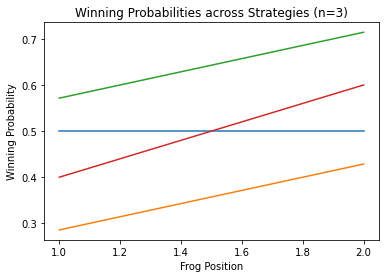

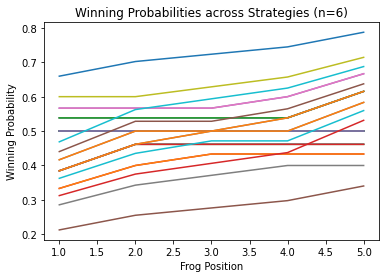

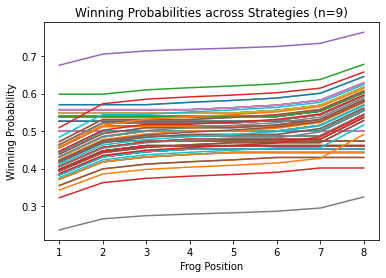

In [78]:
for n in [3,6,9]:
  #Initialize MDP
  FrogEscape = FrogMDP(n)

  for i in range(2**(n-1)):
    #Create policies
    action_for: Dict[LilyPadState, str] = {}
    for s in range(1, n):
        if i%2:
          action_for[LilyPadState(s)] = 'A'
        else:
          action_for[LilyPadState(s)] = 'B'
        i = i//2
    #Create MRP
    FrogEscapeMRP = FrogEscape.apply_finite_policy(FiniteDeterministicPolicy(action_for))
    vec = FrogEscapeMRP.get_value_function_vec(gamma=1)
    plt.plot(np.arange(1,n), vec)
  plt.ylabel('Winning Probability')
  plt.xlabel('Frog Position')
  plt.title('Winning Probabilities across Strategies (n='+str(n)+')')
  plt.show()

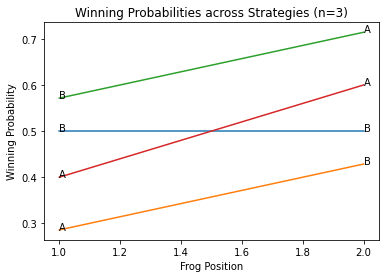

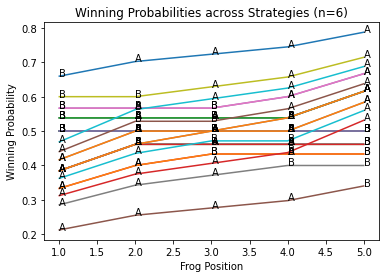

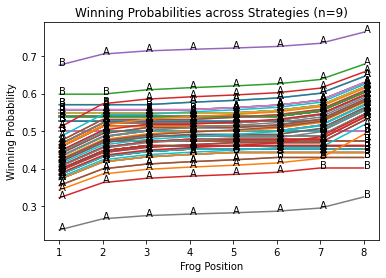

In [79]:
for n in [3,6,9]:
  #Initialize MDP
  FrogEscape = FrogMDP(n)

  for i in range(2**(n-1)):
    #Create policies
    action_for: Dict[LilyPadState, str] = {}
    for s in range(1, n):
        if i%2:
          action_for[LilyPadState(s)] = 'A'
        else:
          action_for[LilyPadState(s)] = 'B'
        i = i//2
    #Create MRP
    FrogEscapeMRP = FrogEscape.apply_finite_policy(FiniteDeterministicPolicy(action_for))
    vec = FrogEscapeMRP.get_value_function_vec(gamma=1)
    plt.plot(np.arange(1,n), vec)
    for d in range(1,n):
      plt.text(d, vec[d-1], action_for[LilyPadState(d)])
  plt.ylabel('Winning Probability')
  plt.xlabel('Frog Position')
  plt.title('Winning Probabilities across Strategies (n='+str(n)+')')
  plt.show()

Note that in the three examples, the frog should only croak B when it is on the first liliy pad. Apart from that, it should always croak A.